In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# EDA

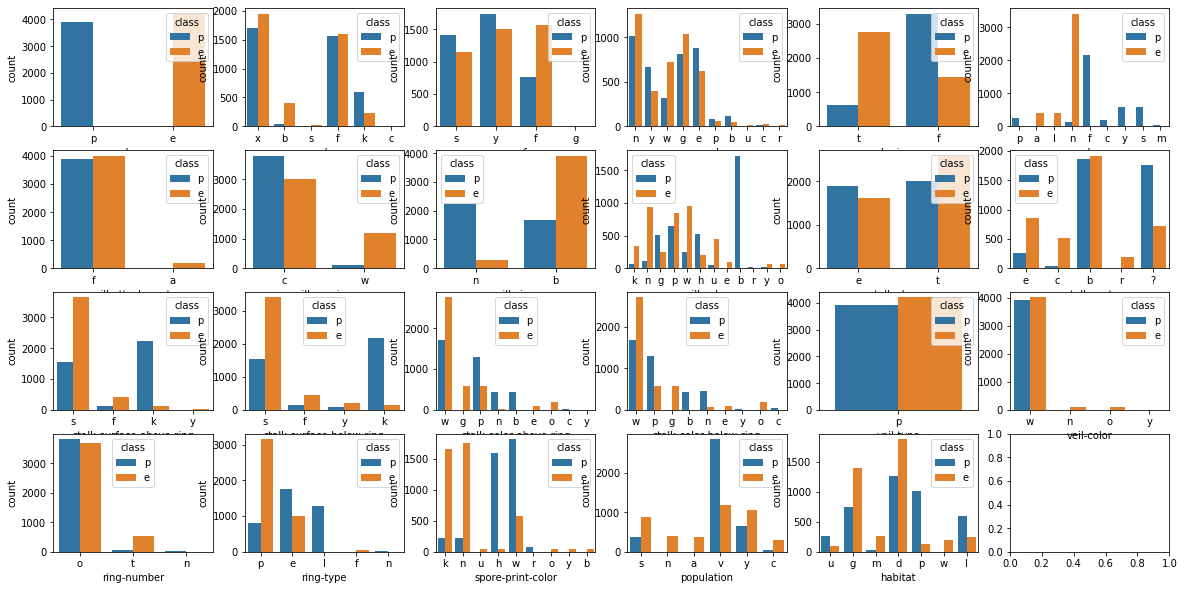

In [4]:
plt.subplots(4,6,figsize=(20,10))
a=1
for i,s in enumerate(df.columns):
    plt.subplot(4,6,a)
    sns.countplot(x=df[s],hue=df['class'])
    a+=1

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_coded = pd.DataFrame() 

for i in df.columns :
    df_coded[i]=le.fit_transform(df[i])

# Feature Engineering

In [21]:
df=pd.get_dummies(df,drop_first=True)

In [22]:
y=df['class_p']
X=df.drop("class_p",axis=1)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)


# Logistic Regression

C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

The cross validation sample score is 0.999179251344678
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1065
           1       1.00      1.00      1.00       966

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



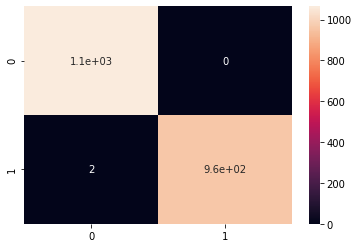

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
lr=LogisticRegression()
lr.fit(X_train,y_train)
print("The cross validation sample score is",cross_val_score(lr,X_train,y_train,cv=5).mean())
pred=lr.predict(X_test)
print(classification_report(y_test,pred))

sns.heatmap(confusion_matrix(y_test,pred),annot=True)

# Decision Tree Classifier

C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

The cross validation sample score is 0.999179251344678
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1065
           1       1.00      1.00      1.00       966

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



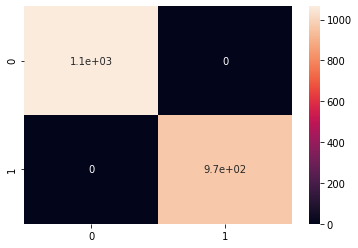

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print("The cross validation sample score is",cross_val_score(lr,X_train,y_train,cv=5).mean())
pred=dtc.predict(X_test)
print(classification_report(y_test,pred))

sns.heatmap(confusion_matrix(y_test,pred),annot=True)

# Random Forest Classifer

C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: 

The cross validation sample score is 0.9991796554552913
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1039
           1       1.00      1.00      1.00       992

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



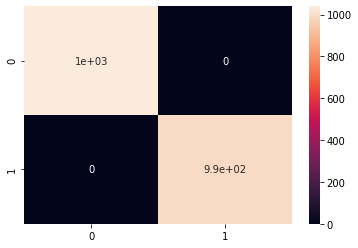

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
print("The cross validation sample score is",cross_val_score(lr,X_train,y_train,cv=5).mean())
pred=rf.predict(X_test)
print(classification_report(y_test,pred))

sns.heatmap(confusion_matrix(y_test,pred),annot=True)

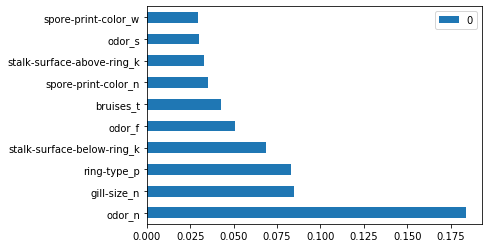

In [107]:
pd.DataFrame(rf.feature_importances_,index=X_train.columns).sort_values(0,ascending=False).head(10).plot(kind='barh')

As we saw in the correlation the odor is probably the strongest indicator of whether a mushroom is poisonous or not.Furthermoregill_size & ring_type are also important features to be evaluated